In [1]:
%matplotlib notebook

import numpy as np
from numpy import *
from math import *
from numpy.linalg import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
from matplotlib import cm
from scipy.integrate import odeint

**Juan Felipe Zapata CC: 1214748144**

Se tiene elipsoide (consideramos una peonza simétrica $a=b$) que se encuentra inicialmente moviendose con una velocidad angular $\vec{\Omega}_i$ respecto a un sistema  inercial. ¿Cuál es el torque que debemos aplicar al elipsoide   si  queremos que tenga una velocidad angular final  $\vec{\Omega}_f$?

Primero describimos al elipsoide  $$\frac{x^{2}}{a^{2}}+\frac{y^{2}}{b^{2}}+\frac{z^{2}}{c^{2}}=1$$ 

Para poder graficar necesitamos  cambiar a coodenadas esféricas: 

$$\begin{bmatrix} 
x\\
y\\
z
\end{bmatrix}= \begin{bmatrix} 
a \cos \phi \sin \theta\\
b \sin \phi \sin \theta\\
c \cos \theta
\end{bmatrix}$$


En donde $ 0 \leq \phi \leq 2\pi $  es en  ángulo azimutal,  $ 0 \leq \theta \leq \pi $ ángulo cenital y los números $a,b,c$ son la longitud de los ejes del elipsoide. 

 Los parámetros que tomamos para esta situación se pueden cambiar en la siguiente celda: 


In [2]:
[a,b,c]=[1,1,2] # ejes del elipsoide [m] peonza simétrica
W_i=np.array([-1,2,3]) # velocidad angular inicial[s^{-1}]
W_f=np.array([1,-1,2]) # velocidad angular final (deseada) [s^{-1}]
m=1 #masa del elipsoide kg 



W_in=(1/norm(W_i))*W_i #normalizando
W_fn=(1/norm(W_f))*W_f #normalizando


<IPython.core.display.Javascript object>


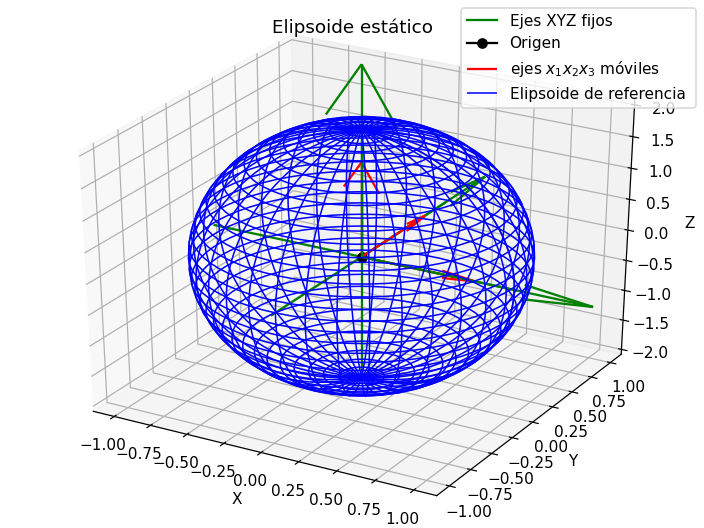

In [136]:
%matplotlib notebook

import numpy as np
from numpy import *
from math import *
from numpy.linalg import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
from matplotlib import cm
from scipy.integrate import odeint

theta=np.linspace(0,np.pi,70)
phi=np.linspace(0,2*np.pi,70)


Theta,Phi=np.meshgrid(theta,phi)

x=a*np.sin(Theta)*np.cos(Phi)
y=b*np.sin(Theta)*np.sin(Phi)
z=c*np.cos(Theta)

fig0=plt.figure()
ax=Axes3D(fig0)

###################################
#vectores que indican la dirección de los ejes positivos
ax.quiver(0,0,0,a,0,0, color='green', length=1.5) 
ax.quiver(0,0,0,0,b,0, color='green', length=1.5)
ax.quiver(0,0,0,0,0,c, color='green', length=1.5)


ax.quiver(0,0,0,a/2,0,0, color='r', length=1.5) 
ax.quiver(0,0,0,0,b/2,0, color='r', length=1.5, label='ejes $x_1 x_2 x_3$ móviles')
ax.quiver(0,0,0,0,0,c/2, color='r', length=1.5)
###################################


##################################
#rayas para extender los ejes

x1=[-a,a]; x2=[0,0];x3=[0,0] 
y1=[0,0];y2=[-b,b];y3=[0,0]
z1=[0,0];z2=[0,0];z3=[-c,c]

ax.plot(x1,y1,z1, color='green',label='Ejes XYZ fijos')
ax.plot(x2,y2,z2,color='green')
ax.plot(x3,y3,z3,color='green')
##################################


################################# Graficando 


ax.plot_wireframe(x,y,z,lw=1, color='b', label='Elipsoide de referencia ')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('Elipsoide estático')
ax.plot((0,),(0,),(0,), marker='o',c='k', label='Origen')
plt.legend()
plt.show()



Como el elipsoide tiene una velocidad angular inicial $\vec{\Omega}_i=\begin{bmatrix} 
\Omega_{ix} \\
\Omega_{iy}\\
\Omega_{iz}
\end{bmatrix}$ entonces su posición respecto a los ejes inerciales cambia a medida que este rota alrededor del eje que define la velocidad angular inicial, para encontrar las nuevas coordenadas del elipsoide, utilizamos una matriz de rotación en tres dimensiones alrededor de un eje arbitrario definido por un vector unitario $\vec{u}=\begin{bmatrix} u_x\\
u_y\\
u_z
\end{bmatrix}$


$$R=\begin{bmatrix} 
\cos \psi + u_x^{2}(1-\cos \psi) & u_x u_y (1-\cos \psi)-u_z \sin \psi & u_x u_z (1- \cos \psi) + u_y \sin \psi\\
u_x u_y (1-\cos \psi)+u_z \sin \psi& \cos \psi + u_y^{2}(1-\cos \psi)& u_y u_z (1-\cos \psi) -u_x \sin \psi \\
u_z u_x (1-\cos \psi) -u_y \sin \psi& u_z u_y (1- \cos \psi) + u_x \sin \psi & \cos \psi + u_z^{2} (1-\cos \psi)
\end{bmatrix}$$

$\psi$ es el ángulo de giro del elipsoide alrededor del eje de la velocidad angular.Luego, conociendo las posiciones de los puntos del elipsoide en reposo respecto al sistema inercial $X,Y,Z$, podemos conocer sus posiciones respecto al mismo sistema cuando éste se está moviendo con velocidad $\vec{\Omega}_i$, con la siguiente ecuación: 

$$\begin{bmatrix} 
x'\\
y'\\
z'
\end{bmatrix}=R \begin{bmatrix} 
x\\
y\\
z
\end{bmatrix}=\begin{bmatrix} 
\cos \psi + u_x^{2}(1-\cos \psi) & u_x u_y (1-\cos \psi)-u_z \sin \psi & u_x u_z (1- \cos \psi) + u_y \sin \psi\\
u_x u_y (1-\cos \psi)+u_z \sin \psi& \cos \psi + u_y^{2}(1-\cos \psi)& u_y u_z (1-\cos \psi) -u_x \sin \psi \\
u_z u_x (1-\cos \psi) -u_y \sin \psi& u_z u_y (1- \cos \psi) + u_x \sin \psi & \cos \psi + u_z^{2} (1-\cos \psi)
\end{bmatrix}\begin{bmatrix} 
a \cos \phi \sin \theta\\
b \sin \phi \sin \theta\\
c \cos \theta
\end{bmatrix}$$


In [130]:
def RX(x,y,z,W_i,A): 
    
    return np.array([x*(cos(A)+W_i[0]**2*(1-cos(A)))+y*(W_i[0]*W_i[1]*(1-cos(A))-W_i[2]*sin(A))+ z*(W_i[0]*W_i[2]*(1-cos(A))+W_i[1]*sin(A)),
                   x*(W_i[0]*W_i[1]*(1-cos(A))+W_i[2]*sin(A))+y*(cos(A)+(W_i[1]**2)*(1-cos(A)))+z*(W_i[1]*W_i[2]*(1-cos(A))-W_i[0]*sin(A)) ,
                 x*(W_i[2]*W_i[0]*(1-cos(A))-W_i[1]*sin(A))+y*(W_i[2]*W_i[1]*(1-cos(A))+W_i[0]*sin(A))+z*(cos(A)+(W_i[2]**2)*(1-cos(A)))    ])


def R(W_i,A): 
    
    return np.array([[cos(A)+W_i[0]**2*(1-cos(A)),W_i[0]*W_i[1]*(1-cos(A))-W_i[2]*sin(A),W_i[0]*W_i[2]*(1-cos(A))+W_i[1]*sin(A)],
                     [W_i[0]*W_i[1]*(1-cos(A))+W_i[2]*sin(A),cos(A)+(W_i[1]**2)*(1-cos(A)),W_i[1]*W_i[2]*(1-cos(A))-W_i[0]*sin(A)],
                     [W_i[2]*W_i[0]*(1-cos(A))-W_i[1]*sin(A),W_i[2]*W_i[1]*(1-cos(A))+W_i[0]*sin(A),cos(A)+(W_i[2]**2)*(1-cos(A))]])

<IPython.core.display.Javascript object>


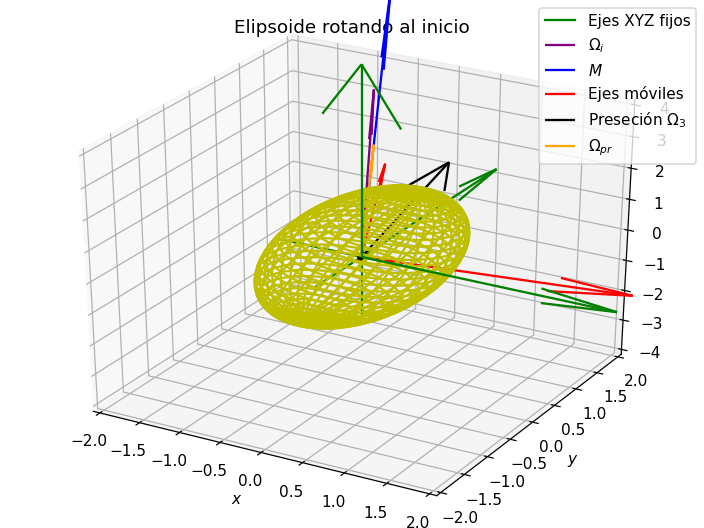

In [150]:
%matplotlib notebook

import numpy as np
from numpy import *
from math import *
from numpy.linalg import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
from matplotlib import cm
from scipy.integrate import odeint

theta=np.linspace(0,np.pi,70)
phi=np.linspace(0,2*np.pi,70)


Theta,Phi=np.meshgrid(theta,phi)

x=a*np.sin(Theta)*np.cos(Phi)
y=b*np.sin(Theta)*np.sin(Phi)
z=c*np.cos(Theta)

fig=plt.figure()
ax=Axes3D(fig)

A=np.linspace(0,2*pi,25)


def actualizar(i): 
    ax.clear()
    ax.quiver(0,0,0,a,0,0, color='green', length=3) 
    ax.quiver(0,0,0,0,b,0, color='green', length=3)
    ax.quiver(0,0,0,0,0,c, color='green', length=3)
    #rayas para extender los ejes

    x1=[-a,a]; x2=[0,0];x3=[0,0] 
    y1=[0,0];y2=[-b,b];y3=[0,0]
    z1=[0,0];z2=[0,0];z3=[-c,c]
    
    ax.plot(x1,y1,z1, color='green',label='Ejes XYZ fijos')
    ax.plot(x2,y2,z2,color='green')
    ax.plot(x3,y3,z3,color='green')
    
    ax.plot((0,),(0,),(0,), marker='o',c='k')
    
    ax.quiver(0,0,0,W_i[0],W_i[1],W_i[2], color='purple', length=1, label='$\Omega_i$')
    ax.quiver(0,0,0,(1/2)*m*(b**2+c**2)*W_i[0],(1/2)*m*(a**2+c**2)*W_i[1],(1/2)*m*(a**2+b**2)*W_i[2], color='b', length=1, label='$M$')
    
    
    
    plt.title('Elipsoide rotando al inicio')
    ax.set_xlim(-2*a,2*a)
    ax.set_ylim(-2*b,2*b)
    ax.set_zlim(-2*c,2*c)
    
    p=norm([R(W_in,A[0])[0,0],R(W_in,A[0])[1,0],R(W_in,A[0])[2,0]])/norm([R(W_in,A[i])[0,0],R(W_in,A[i])[1,0],R(W_in,A[i])[2,0]])
    q=norm([R(W_in,A[0])[0,1],R(W_in,A[0])[1,1],R(W_in,A[0])[2,1]])/norm([R(W_in,A[i])[0,1],R(W_in,A[i])[1,1],R(W_in,A[i])[2,1]])
    r=norm([R(W_in,A[0])[0,2],R(W_in,A[0])[1,2],R(W_in,A[0])[2,2]])/norm([R(W_in,A[i])[0,2],R(W_in,A[i])[1,2],R(W_in,A[i])[2,2]])
            
    ax.quiver(0,0,0,p*R(W_in,A[i])[0,0],p*R(W_in,A[i])[1,0],p*R(W_in,A[i])[2,0] , color='r', length=3, label='Ejes móviles')
    ax.quiver(0,0,0,q*R(W_in,A[i])[0,1],q*R(W_in,A[i])[1,1],q*R(W_in,A[i])[2,1] , color='r', length=3)
    ax.quiver(0,0,0,r*R(W_in,A[i])[0,2],r*R(W_in,A[i])[1,2],r*R(W_in,A[i])[2,2] , color='k', length=3, label='Preseción $\Omega_3$')
    
    I1=(1/2)*m*(b**2+c**2)
    
    ax.quiver(0,0,0,(1/I1)*(1/2)*m*(b**2+c**2)*W_i[0],
              (1/I1)*(1/2)*m*(a**2+c**2)*W_i[1],(1/I1)*(1/2)*m*(a**2+b**2)*W_i[2], color='orange', length=1, label='$\Omega_{pr}$')
    

    
    

        
    s=norm([RX(x,y,z,W_in,A[0])[0],RX(x,y,z,W_in,A[0])[1],RX(x,y,z,W_in,A[0])[2]])/norm([RX(x,y,z,W_in,A[i])[0],RX(x,y,z,W_in,A[i])[1],RX(x,y,z,W_in,A[i])[2]])
    ax.plot_wireframe(s*RX(x,y,z,W_in,A[i])[0],s*RX(x,y,z,W_in,A[i])[1],s*RX(x,y,z,W_in,A[i])[2], color='y')
   
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    plt.legend()
    plt.grid()
    
    
#Animación 
ani1=animation.FuncAnimation(fig,actualizar,range(len(A)), interval=1, repeat=True)

plt.show()

En la animación anterior podemos  observar como el elipsoide (peonza simétrica) presenta dos preseciones una alrededor del momento  angular $\vec{M}=I_1\left( \vec{\Omega}_1+\vec{\Omega}_2 \right)+I_3 \vec{\Omega}_3$, con rapidéz $\Omega_3=\frac{M \cos \mu}{I_3}$, $\mu$ es el ángulo entre el momento angular y el eje de simetría. Esta rapidéz de preseción está dirigida a lo largo del eje de simetría, el cual en este caso es el eje  móvil $x_3$ y otra llamada rapidéz de preseción $\Omega_{pr}=\frac{M}{I_1}$ dirigida perpendicular al eje de simetría como podemos observar mejor en la siguiente imágen del libro de mecánica de landau.

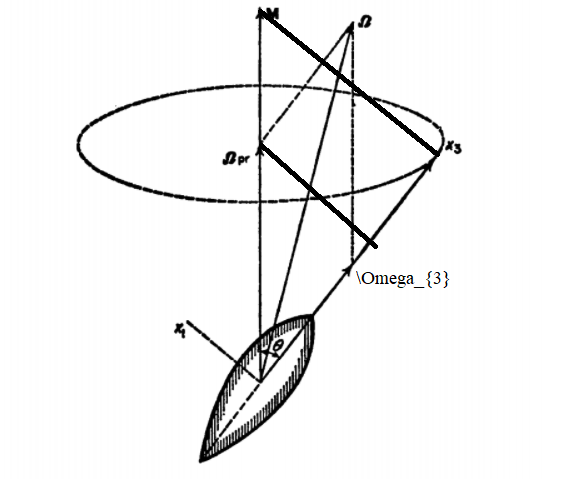



Ahora queremos que el elipsoide termine rotando con velocidad angular $\vec{\Omega}_f=\begin{bmatrix} 
\Omega_{fx} \\
\Omega_{fy}\\
\Omega_{fz}
\end{bmatrix}$ aplicando un torque. 

Para esto necesitamos plantear las ecuaciones de euler: 

$$    I_1 \dot{ \Omega}_1+(I_3-I_2)\Omega_2\Omega_3 =K_1$$

$$I_2 \dot{ \Omega}_2+(I_1-I_3) \Omega_1 \Omega_3 =K_2$$

 $$I_3 \dot{ \Omega}_3+(I_2-I_1)\Omega_1\Omega_2=K_3$$
 
 
 De las ecuaciones anteriores vemos que no importa la velocidad angular inicial del elipsoide, pues para determinar las componentes del torque sólo necesitamos conocer las componentes de la velocidad angular final deseada.
 
 
Los momentos de inercia que aparecen en las ecuaciones son los momentos principales de inercia, $I_1=\frac{1}{2}m (b^2+c^2)$,$I_2=\frac{1}{2}m (a^2+c^2)$, $I_3=\frac{1}{2}m (a^2+b^2)$, $m=1 kg$. Los valores $\Omega_j$ son las proyecciones de la velocidad angular final sobre cada uno de los ejes del sistema inercial.


Para nuestro problema las ecuaciones quedan así: 



$$    \frac{1}{2}m(b^2-c^2)|proy_{\hat{Y}}\vec{\Omega}_f|  |proy_{\hat{Z}}\vec{\Omega}_f|
=K_x$$

$$ \frac{1}{2}m(c^2-a^2)|proy_{\hat{X}}\vec{\Omega}_f|  | proy_{\hat{Z}}\vec{\Omega}_f |=K_y$$

 $$ \frac{1}{2}m(a^2-b^2)|proy_{\hat{X}}\vec{\Omega}_f | | proy_{\hat{Y}} \vec{\Omega}_f|=K_z$$
 
 




In [132]:
X=np.array([1,0,0])
Y=np.array([0,1,0])
Z=np.array([0,0,1])



K1=1/2*(m)*(b**2-c**2)*norm(dot(W_f,Y)*Y)*norm(dot(W_f,Z)*Z)   
K2=1/2*(m)*(c**2-a**2)*norm(dot(W_f,X)*X)*norm(dot(W_f,Z)*Z)
K3=1/2*(m)*(a**2-b**2)*norm(dot(W_f,X)*X)*norm(dot(W_f,Y)*Y)   


K=[K1,K2,K3]


print('El toque que se debe aplicar es $\ vec{K}$=',K,'N m')

El toque que se debe aplicar es $\ vec{K}$= [-3.0, 3.0, 0.0] N m


<IPython.core.display.Javascript object>


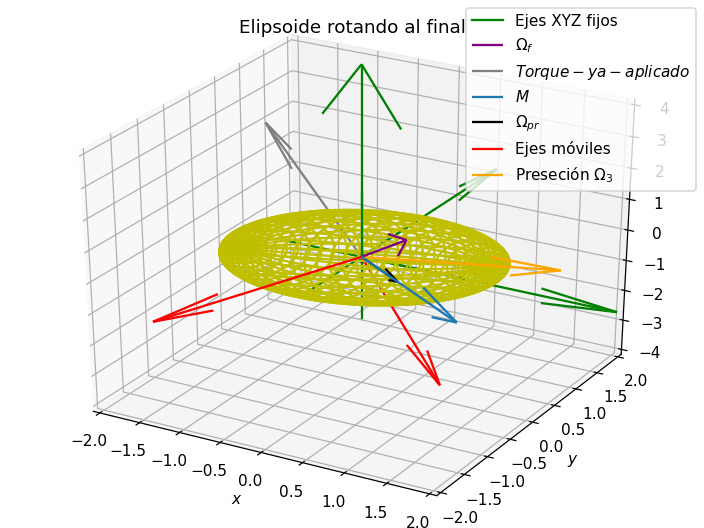

In [148]:
%matplotlib notebook

import numpy as np
from numpy import *
from math import *
from numpy.linalg import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
from matplotlib import cm
from scipy.integrate import odeint

theta=np.linspace(0,np.pi,70)
phi=np.linspace(0,2*np.pi,70)


Theta,Phi=np.meshgrid(theta,phi)

x=a*np.sin(Theta)*np.cos(Phi)
y=b*np.sin(Theta)*np.sin(Phi)
z=c*np.cos(Theta)


fig1=plt.figure()
ax=Axes3D(fig1)

A=np.linspace(0,2*pi,25)


def actualizar(i): 
    ax.clear()
    ax.quiver(0,0,0,a,0,0, color='green', length=3) 
    ax.quiver(0,0,0,0,b,0, color='green', length=3)
    ax.quiver(0,0,0,0,0,c, color='green', length=3)
    #rayas para extender los ejes

    x1=[-a,a]; x2=[0,0];x3=[0,0] 
    y1=[0,0];y2=[-b,b];y3=[0,0]
    z1=[0,0];z2=[0,0];z3=[-c,c]
    
    ax.plot(x1,y1,z1, color='green',label='Ejes XYZ fijos')
    ax.plot(x2,y2,z2,color='green')
    ax.plot(x3,y3,z3,color='green')
    
    ax.plot((0,),(0,),(0,), marker='o',c='k')
    
    ax.quiver(0,0,0,W_fn[0],W_fn[1],W_fn[2], color='purple', length=3, label='$\Omega_f$')
    
    ax.quiver(0,0,0,K1,K2,K3, color='gray', label='$Torque-ya-aplicado$')
    
    ax.quiver(0,0,0,(1/2)*m*(b**2+c**2)*W_f[0],(1/2)*m*(a**2+c**2)*W_f[1],(1/2)*m*(a**2+b**2)*W_f[2], length=1, label='$M$')
    I1=(1/2)*m*(b**2+c**2)
    ax.quiver(0,0,0,(1/I1)*(1/2)*m*(b**2+c**2)*W_f[0],
              (1/I1)*(1/2)*m*(a**2+c**2)*W_f[1],(1/I1)*(1/2)*m*(a**2+b**2)*W_f[2], color='black', length=1, label='$\Omega_{pr}$')
    
    plt.title('Elipsoide rotando al final')
    
    ax.set_xlim(-2*a,2*a)
    ax.set_ylim(-2*b,2*b)
    ax.set_zlim(-2*c,2*c)
    
    p=norm([R(W_fn,A[0])[0,0],R(W_fn,A[0])[1,0],R(W_fn,A[0])[2,0]])/norm([R(W_fn,A[i])[0,0],R(W_fn,A[i])[1,0],R(W_fn,A[i])[2,0]])
    q=norm([R(W_fn,A[0])[0,1],R(W_fn,A[0])[1,1],R(W_fn,A[0])[2,1]])/norm([R(W_fn,A[i])[0,1],R(W_fn,A[i])[1,1],R(W_fn,A[i])[2,1]])
    r=norm([R(W_fn,A[0])[0,2],R(W_fn,A[0])[1,2],R(W_fn,A[0])[2,2]])/norm([R(W_fn,A[i])[0,2],R(W_fn,A[i])[1,2],R(W_fn,A[i])[2,2]])
            
    ax.quiver(0,0,0,p*R(W_fn,A[i])[0,0],p*R(W_fn,A[i])[1,0],p*R(W_fn,A[i])[2,0] , color='r', length=3, label='Ejes móviles')
    ax.quiver(0,0,0,q*R(W_fn,A[i])[0,1],q*R(W_fn,A[i])[1,1],q*R(W_fn,A[i])[2,1] , color='r', length=3)
    ax.quiver(0,0,0,r*R(W_fn,A[i])[0,2],r*R(W_fn,A[i])[1,2],r*R(W_fn,A[i])[2,2] , color='orange', length=3, label='Preseción $\Omega_3$')

    s=norm([RX(x,y,z,W_fn,A[0])[0],RX(x,y,z,W_fn,A[0])[1],RX(x,y,z,W_fn,A[0])[2]])/norm([RX(x,y,z,W_fn,A[i])[0],RX(x,y,z,W_fn,A[i])[1],RX(x,y,z,W_fn,A[i])[2]])
    ax.plot_wireframe(s*RX(x,y,z,W_fn,A[i])[0],s*RX(x,y,z,W_fn,A[i])[1],s*RX(x,y,z,W_fn,A[i])[2], color='y')
   
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    plt.legend()
    plt.grid()
    
    
#Animación 
ani2=animation.FuncAnimation(fig1,actualizar,range(len(A)), interval=1, repeat=True)

plt.show()